<img src='http://arch.ut.ac.ir/documents/70819125/2017cca1-b036-41de-bcce-f7376699275b' alt="UT logo" width="120" height="120" align="left">

<h1 align=center><font size=5> <b><i>Machine Learning(Fall 2020)</b><br>Task 3</i></font></h1>

#### In this notebook we want to become more familiar with data visualization and classify data with Logistic Regression.

# Section 1: MNIST Dataset
You can find information about the dataset and download it from [here](https://www.kaggle.com/oddrationale/mnist-in-csv)(please download train dataset).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
X, y = fetch_openml('mnist_784', version = 1, return_X_y = True)

## Visualize Dataset
Define functions for each purpose:
1. plot a digit

<img src="images/digit.png" width="50" height="50">

2. plot a series of instances of each class

<img src="images/digits.png" width="300" height="300">
3. Plot a shifted digit

<img src="images/shift.png" width="300" height="70">

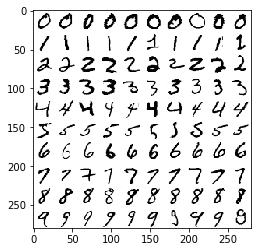

In [6]:
plt.imshow(np.reshape(X[np.random.randint(X.shape[0])], (28, 28)), cmap = plt.get_cmap('Greys'))
series = []
for i in range(10):
    temp = X[y == str(i)]
    temp = temp[:10]
    temp = temp.reshape((10, 28, 28))
    temp = temp.transpose(1, 0, 2)
    temp = temp.reshape(28, 10 * 28)
    series.append(temp)
plt.imshow(np.asarray(series).reshape(10 * 28, 10 * 28), cmap = plt.get_cmap('Greys'))
plt.show()

In [7]:
def imageShift(data, dx, dy, title):
    data = np.reshape(data, (28,28))
    data = np.roll(data, dx, axis = 1)
    data = np.roll(data, dy, axis = 0)
    if dy > 0:
        data[:dy, :] = 0
    elif dy < 0:
        data[dy:, :] = 0
    if dx > 0:
        data[:, :dx] = 0
    elif dx < 0:
        data[:, dx:] = 0
    plt.imshow(data, cmap=plt.get_cmap('Greys'))
    plt.title(title)
    plt.show()

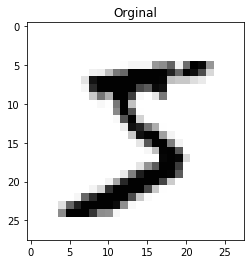

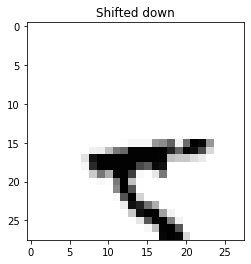

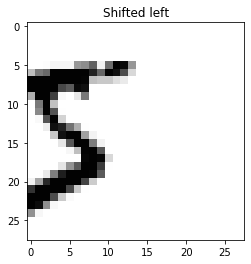

In [11]:
imageShift(X[0], 0, 0, "Orginal")
imageShift(X[0], 0, 10, "Shifted down")
imageShift(X[0], -10, 0, "Shifted left")

## Classification
In this part, you should do a binary classification to predict if a digit is '4' or not. report the requests listed below:
1. Plot Confusion Matrix and ROC
2. Report Accuracy, Sensitivity, Specificity, Precision and Recall.
3. Plot Recall vs Precision for different thresholds (using sklearn.metrics.precision_recall_curve) like the figures below:

<img src="images/rec_vs_pre1 .png" width="300" height="100">
<img src="images/rec_vs_pre2 .png" width="320" height="300">


In [12]:
y4 = list(x == '4' for x in y)
y4 = np.asarray(y4)
X_train, X_test, y_train, y_test = train_test_split(X, y4, test_size = 0.2, random_state = 7)
model = LogisticRegression().fit(preprocessing.scale(X_train), y_train)
predicted = model.predict(preprocessing.scale(X_test))

D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
def plot_confusion_matrix(cm, classes):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cmap = plt.cm.Blues
    title = 'Confusion matrix'
    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy :  [0.98378571 0.98378571]
Sensitivity :  [0.9913119  0.91262136]
Speccifity :  [0.91262136 0.9913119 ]
Precision :  [0.99076413 0.91741742]
Recall :  [0.9913119  0.91262136]


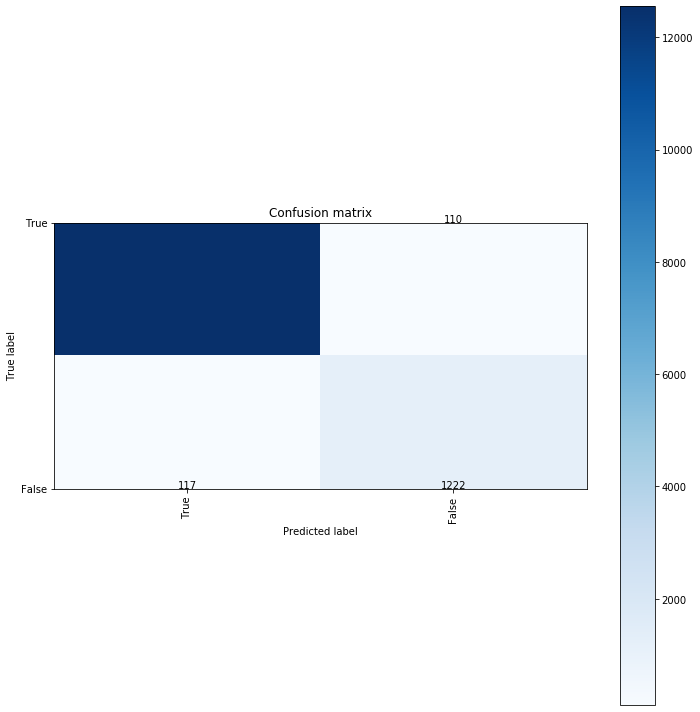

In [16]:
conf_mtx = confusion_matrix(y_test, predicted)
FP = conf_mtx.sum(axis=0) - np.diag(conf_mtx)  
FN = conf_mtx.sum(axis=1) - np.diag(conf_mtx)
TP = np.diag(conf_mtx)
TN = conf_mtx.sum() - (FP + FN + TP)
ACC = (TP + TN) / (TP + FP + FN + TN)
SENSITIVITY = TP / (TP + FN)
SPECCIFITY = TN / (TN + FP) 
PRECISION = TP / (TP + FP)
RECALL = SENSITIVITY
plot_confusion_matrix(conf_mtx, [True, False])
print('Accuracy : ', ACC)
print('Sensitivity : ', SENSITIVITY)
print('Speccifity : ', SPECCIFITY)
print('Precision : ', PRECISION)
print('Recall : ', RECALL)

In [ ]:
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve

In [ ]:
plot_roc_curve(model, X_test, y_test)
plot_precision_recall_curve(model, X_test, y_test)
plt.show()
y_score = model.predict_proba(X_test).max(axis = 1)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
thresholds = np.append([0], thresholds)
plt.plot(thresholds, precision)
plt.plot(thresholds, recall)
plt.show()

# Section 2: Titanic Dataset

You can find information about the dataset and download it from [here](https://www.kaggle.com/c/titanic/data)(please download train dataset).


In [74]:
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')
X_test['Survived'] = gender['Survived']

In [75]:
X_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
X_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Cleaning Dataset
Do some process and answer to questions below:

1. Which columns have missing values?
2. How do you fill the missing values, and why do you use this approach?

In [78]:
X_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
X_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

Columns in train data with missing value : Age, Cabin, Embarked
Columns in train data with missing value : Age, Fare, Cabin

We should delete cabin because most of the datapoints do not have a value for this feature

In [80]:
del X_train['Cabin']
del X_test['Cabin']

We should fill age column with a statistical metric like mean because less than 10% of dataset have missing value for it.

In [81]:
X_train['Age'].fillna(X_train['Age'].mean)
X_test['Age'].fillna(X_test['Age'].mean)

0                                                   34.5
1                                                     47
2                                                     62
3                                                     27
4                                                     22
                             ...                        
413    <bound method Series.mean of 0      34.5\n1   ...
414                                                   39
415                                                 38.5
416    <bound method Series.mean of 0      34.5\n1   ...
417    <bound method Series.mean of 0      34.5\n1   ...
Name: Age, Length: 418, dtype: object

We should drop rows with nan value in fare and embarked because there are less than 1% of dataset.

In [82]:
X_train = X_train.dropna()
X_test = X_test.dropna()

In [83]:
X_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [84]:
X_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

## Exploratory Data Analysis

Answer to these questions by plot relating figures:

1. Compare the age distribution for survivors and the deceased. Do you see any interesting points?
2. Compare the fare distribution for survivors and the deceased. Look at the features' description on Kaggle, is there any other feature that seems to be highly correlated to fare? Explain it.
3. Plot the survivors based on the embarked port. What do you see? Do you have any hypothesis? 
4. Plot data based on traveling alone and with family (you may need to merge 2 columns of data somehow).
5. Which gender was more likely to survive? Do you know why?

People with age lower than 16 mostly survived and people with age more than 63 mostly died in this tragedy.

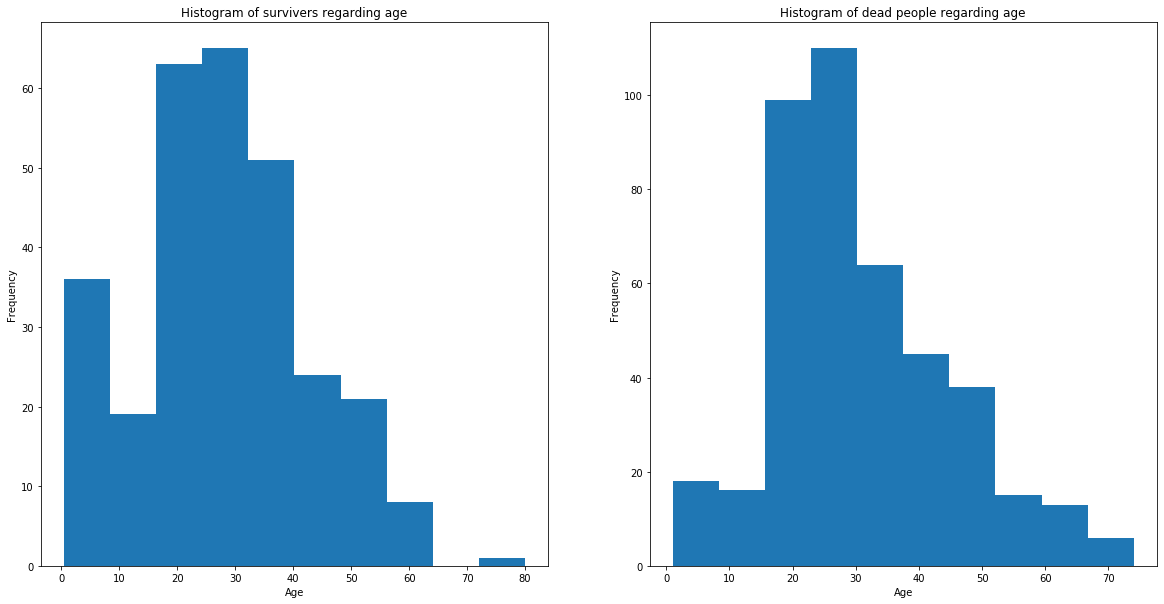

In [85]:
figure, axes = plt.subplots(1, 2, figsize = (20, 10))
axes[0].hist(X_train[X_train['Survived'] == 1]['Age'])
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram of survivers regarding age")
axes[1].hist(X_train[X_train['Survived'] == 0]['Age'])
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of dead people regarding age")
plt.show()

The distribution is similar to fare distribution in society which is a plot like 1/x. It is reasonable that Pclass which is representing ticket type, correlates with passenger fare. You can see that for dead people they are the same(the plots are reverse) but for survivers, pclass did not matter.

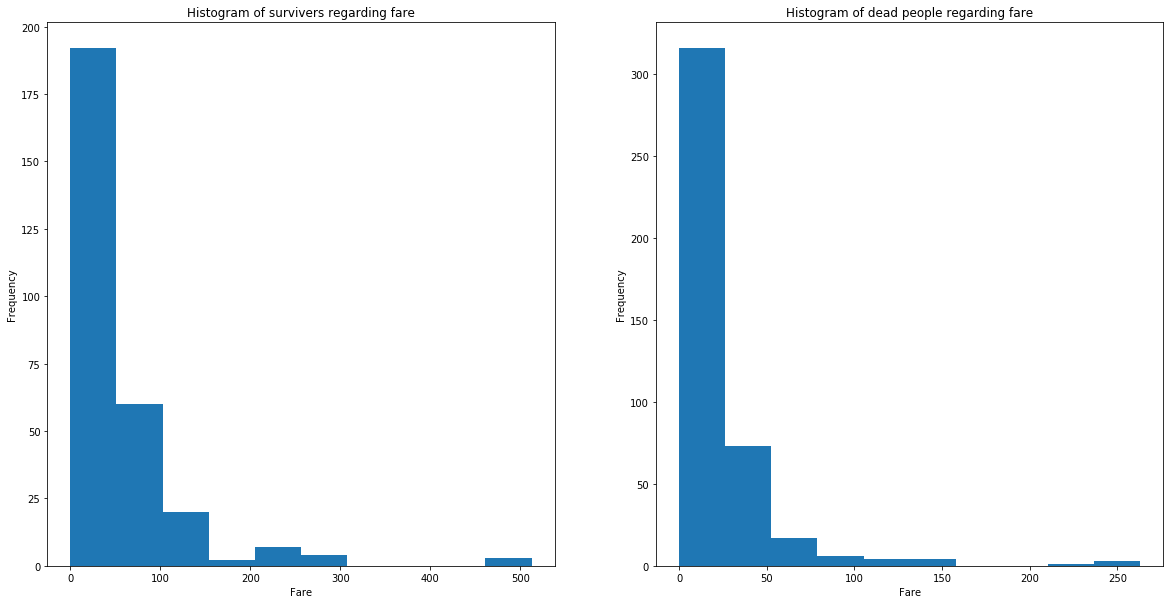

In [86]:
figure, axes = plt.subplots(1, 2, figsize = (20, 10))
axes[0].hist(X_train[X_train['Survived'] == 1]['Fare'])
axes[0].set_xlabel("Fare")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram of survivers regarding fare")
axes[1].hist(X_train[X_train['Survived'] == 0]['Fare'])
axes[1].set_xlabel("Fare")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of dead people regarding fare")
plt.show()

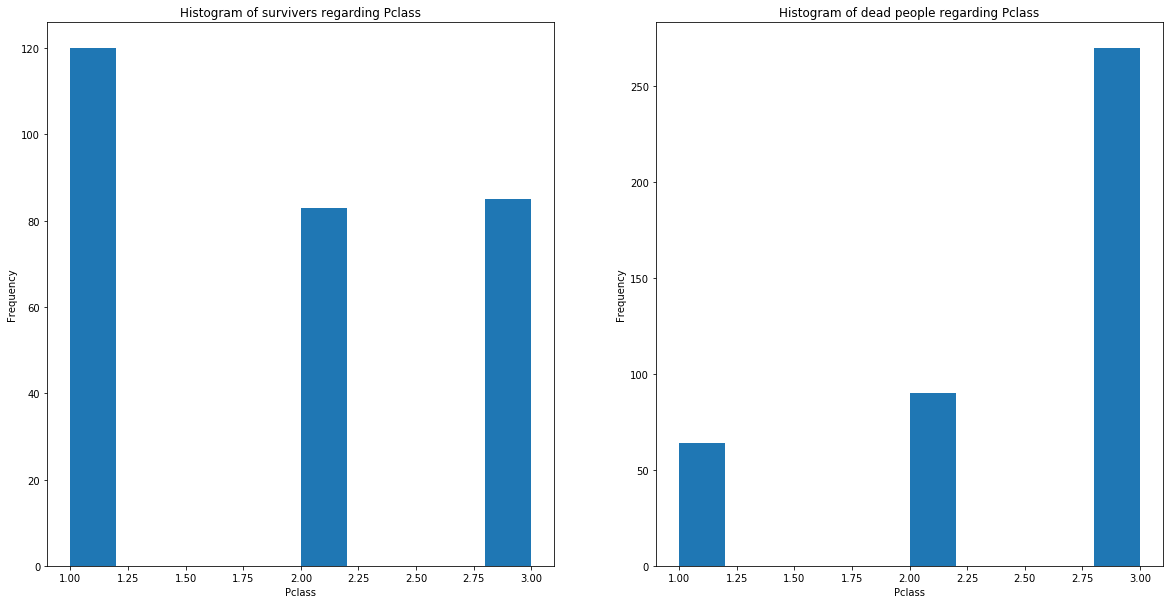

In [87]:
figure, axes = plt.subplots(1, 2, figsize = (20, 10))
axes[0].hist(X_train[X_train['Survived'] == 1]['Pclass'])
axes[0].set_xlabel("Pclass")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram of survivers regarding Pclass")
axes[1].hist(X_train[X_train['Survived'] == 0]['Pclass'])
axes[1].set_xlabel("Pclass")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of dead people regarding Pclass")
plt.show()

It seems like people from port Cherbourg survived mostly. My hypothesis is that the passengers from that port were mostly old people, women and children and were rescued more than others.

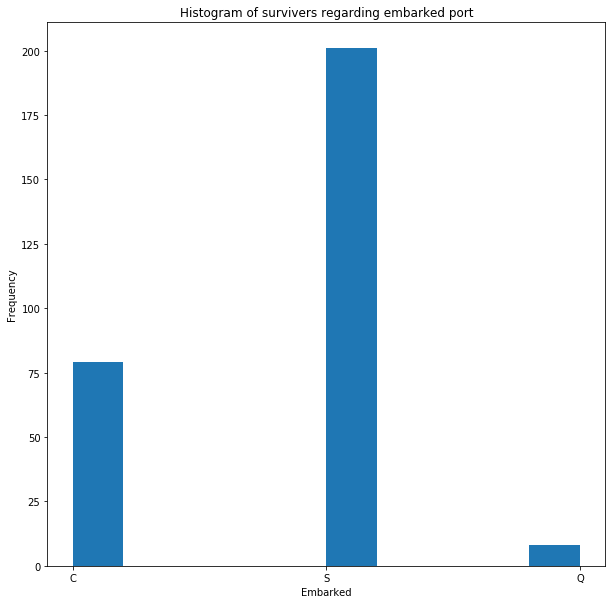

In [88]:
figure, axes = plt.subplots(1, 1, figsize = (10, 10))
axes.hist(X_train[X_train['Survived'] == 1]['Embarked'])
axes.set_xlabel("Embarked")
axes.set_ylabel("Frequency")
axes.set_title("Histogram of survivers regarding embarked port")
plt.show()

It seems like most of the dead peaople were traveling alone in that journey.

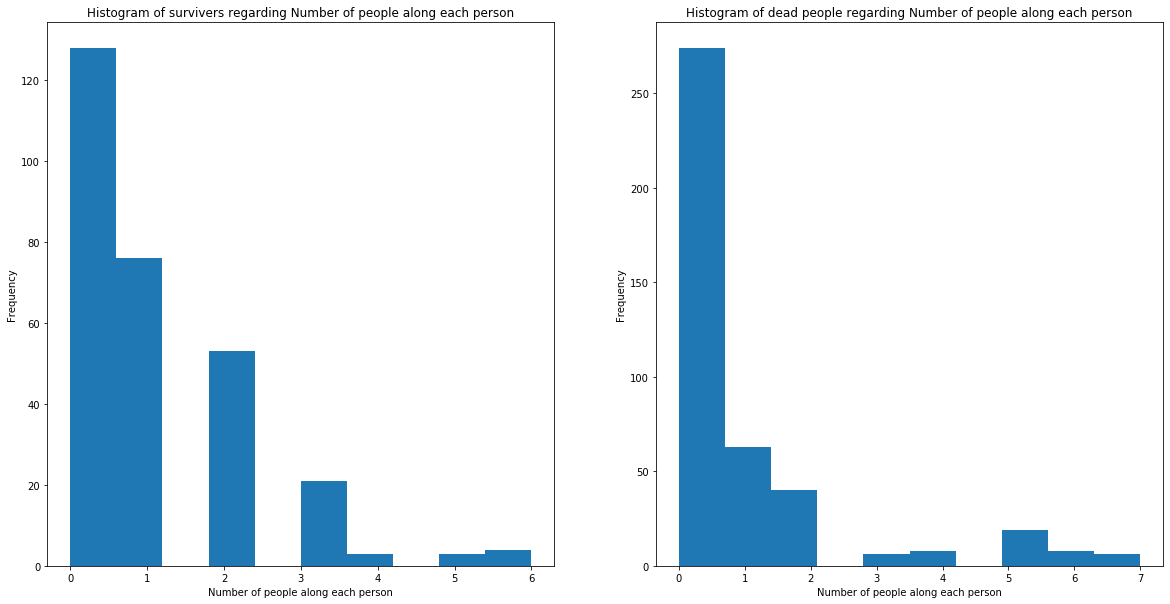

In [89]:
figure, axes = plt.subplots(1, 2, figsize = (20, 10))
axes[0].hist(X_train[X_train['Survived'] == 1]['Parch'] + X_train[X_train['Survived'] == 1]['SibSp'])
axes[0].set_xlabel("Number of people along each person")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram of survivers regarding Number of people along each person")
axes[1].hist(X_train[X_train['Survived'] == 0]['Parch'] + X_train[X_train['Survived'] == 0]['SibSp'])
axes[1].set_xlabel("Number of people along each person")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of dead people regarding Number of people along each person")
plt.show()

It is obvious from the histogram that female survived  more and it was because that femal, children and old people were prioritized in the rescue process.

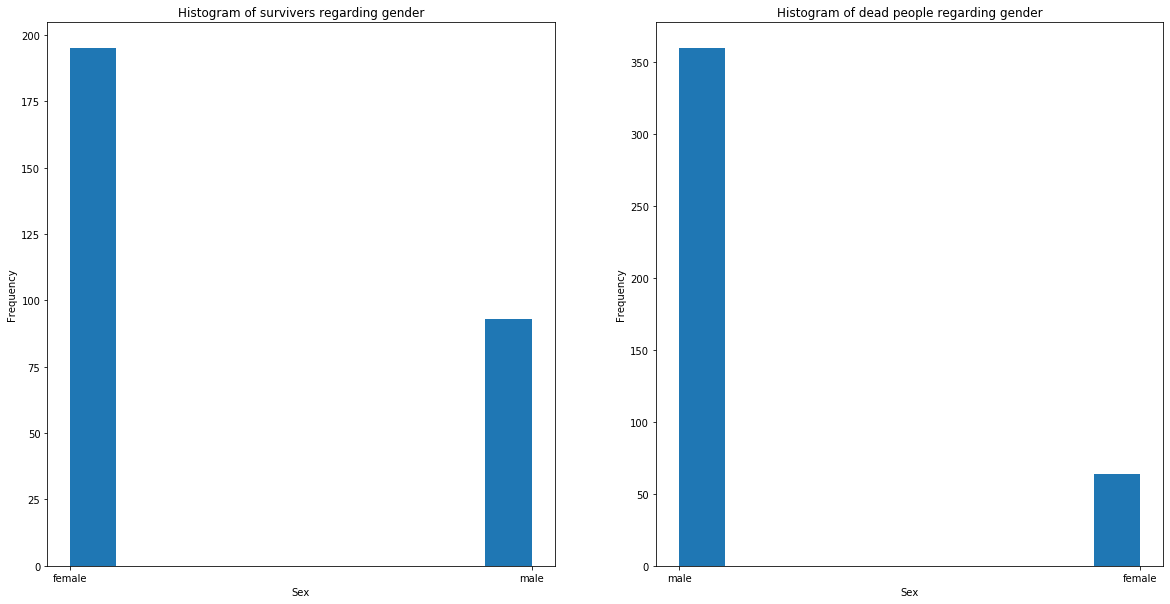

In [90]:
figure, axes = plt.subplots(1, 2, figsize = (20, 10))
axes[0].hist(X_train[X_train['Survived'] == 1]['Sex'])
axes[0].set_xlabel("Sex")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram of survivers regarding gender")
axes[1].hist(X_train[X_train['Survived'] == 0]['Sex'])
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of dead people regarding gender")
plt.show()

## Classification
n this part, you should do a binary classification to predict if a passenger survives or not. report the requests listed below:
1. Plot Confusion Matrix and ROC
2. Report Accuracy, Sensitivity, Specificity, Precision, and Recall.
-------------------------------------------------------------------------------------------------------------------------------
* Like the explanation notebook, do the necessary preprocess transformation on the dataset and report what you have done.  You get a bonus mark if you use dimension reduction techniques.

In [91]:
y_train = X_train[X_train.columns[1]]
y_test = X_test['Survived']

In [92]:
X_train = X_train.loc[:, ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_test = X_test.loc[:, ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [93]:
X_train = X_train.replace({"Sex": {'male':1,'female':0}})
X_test = X_test.replace({"Sex": {'male':1,'female':0}})
X_train = X_train.replace({"Embarked":{'S':0,'Q':1,'C':2}})
X_test = X_test.replace({"Embarked":{'S':0,'Q':1,'C':2}})

In [94]:
model = LogisticRegression().fit(preprocessing.scale(X_train), y_train)
predicted = model.predict(preprocessing.scale(X_test))

D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy :  [0.98489426 0.98489426]
Sensitivity :  [0.99019608 0.97637795]
Speccifity :  [0.97637795 0.99019608]
Precision :  [0.98536585 0.98412698]
Recall :  [0.99019608 0.97637795]


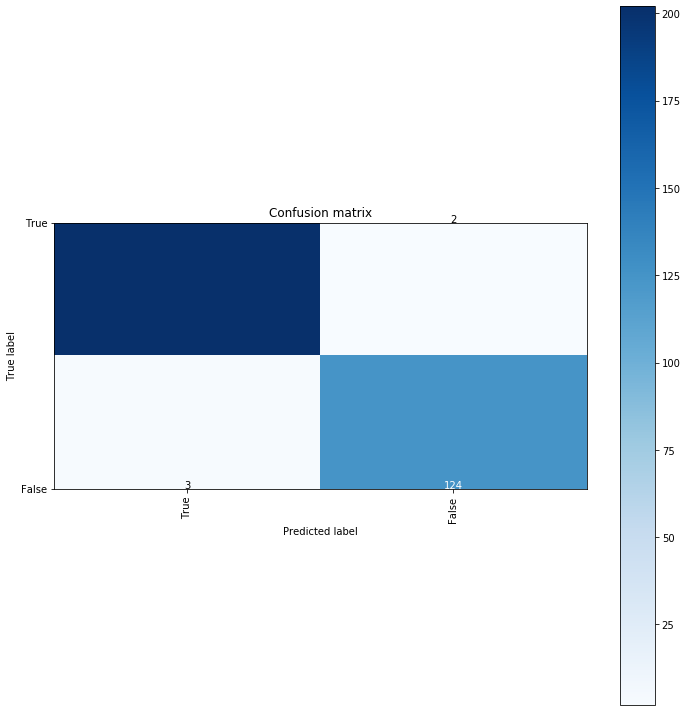

In [97]:
conf_mtx = confusion_matrix(y_test, predicted)
FP = conf_mtx.sum(axis=0) - np.diag(conf_mtx)  
FN = conf_mtx.sum(axis=1) - np.diag(conf_mtx)
TP = np.diag(conf_mtx)
TN = conf_mtx.sum() - (FP + FN + TP)
ACC = (TP + TN) / (TP + FP + FN + TN)
SENSITIVITY = TP / (TP + FN)
SPECCIFITY = TN / (TN + FP) 
PRECISION = TP / (TP + FP)
RECALL = SENSITIVITY
plot_confusion_matrix(conf_mtx,[True,False])
print('Accuracy : ', ACC)
print('Sensitivity : ', SENSITIVITY)
print('Speccifity : ', SPECCIFITY)
print('Precision : ', PRECISION)
print('Recall : ', RECALL)

In [ ]:
plot_roc_curve(model, preprocessing.scale(X_test), y_test)
plt.show()